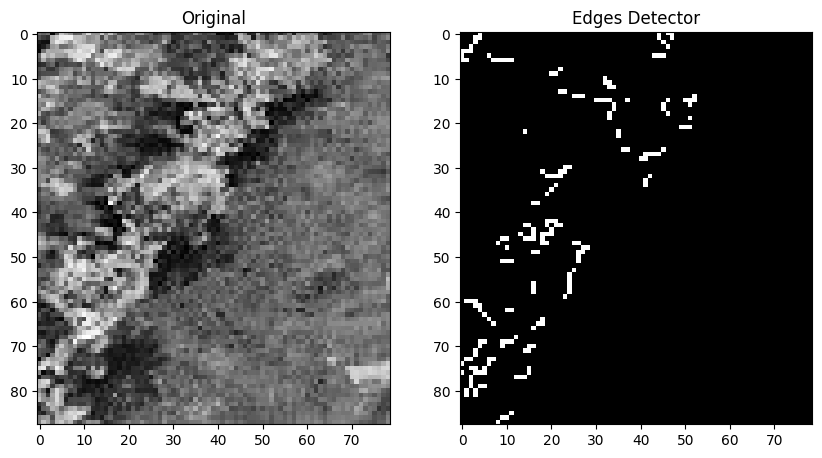

In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

img = cv.imread(r"E:\5th Sem\IMG Processing\Crop_field_cropped.jpg", cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img,550,690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

fig, ax = plt.subplots(1, 2, figsize=(10, 20))
ax[0].imshow(img, cmap="gray")
ax[0].set_title("Original")
ax[1].imshow(edges, cmap="gray")
ax[1].set_title("Edges Detector")
plt.show()

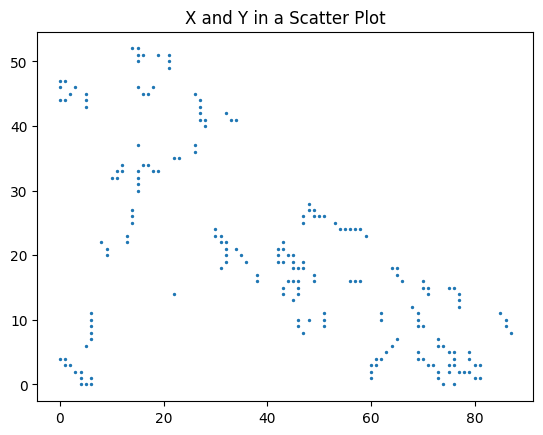

In [10]:
import cv2 as cv
import numpy as np
import matplotlib.pylab as plt

img = cv.imread(r"E:\5th Sem\IMG Processing\Crop_field_cropped.jpg", cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img,550,690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

plt.scatter(y,x, s=2)
plt.title("X and Y in a Scatter Plot")
plt.show()

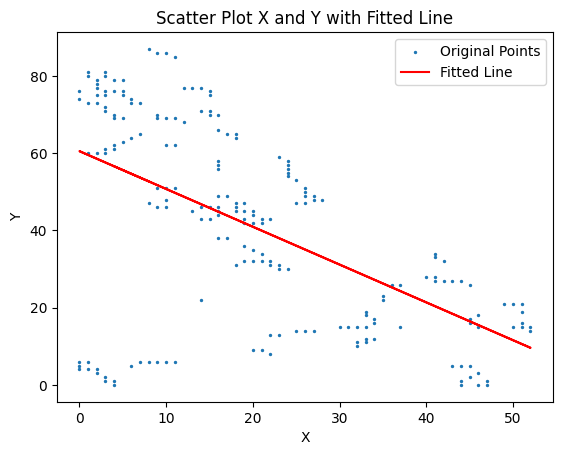

In [19]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"E:\5th Sem\IMG Processing\Crop_field_cropped.jpg", cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, 550, 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

fit_line_coefficients = np.polyfit(x, y, 1)
fitted_line = np.poly1d(fit_line_coefficients)

fitted_y = fitted_line(x)

plt.scatter(x, y,  s=2, label='Original Points')
plt.plot(x, fitted_y, c='red', label='Fitted Line')
plt.title('Scatter Plot X and Y with Fitted Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread(r"E:\5th Sem\IMG Processing\Crop_field_cropped.jpg", cv.IMREAD_GRAYSCALE)

edges = cv.Canny(img, 550, 690)
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

fit_line_coefficients = np.polyfit(x, y, 1)
slope = fit_line_coefficients[0]
angle_degrees = np.degrees(np.arctan(slope))

print("Estimated angle of the crop field:", angle_degrees, "degrees")

Estimated angle of the crop field: -44.38702510610566 degrees


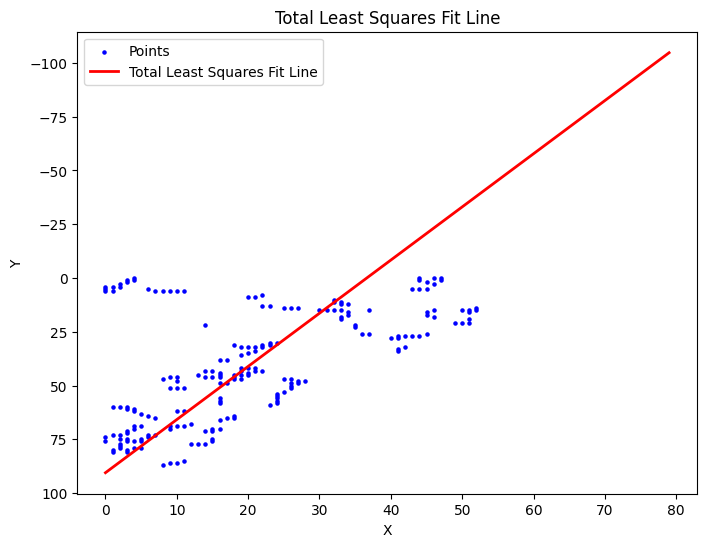

Estimated angle of the crop field: -67.97343481367824 degrees


In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
img = cv.imread(r"E:\5th Sem\IMG Processing\Crop_field_cropped.jpg", cv.IMREAD_GRAYSCALE)

# Perform Canny edge detection
edges = cv.Canny(img, 550, 690)

# Find all edge points
indices = np.where(edges != [0])
x = indices[1]
y = indices[0]

# Perform PCA to find the total least-squares-fit line
X = np.column_stack((x, y))
mean = np.mean(X, axis=0)
X_centered = X - mean
U, S, Vt = np.linalg.svd(X_centered)
unit_vector = Vt.T[:, 0]

# Calculate the slope and intercept of the line
slope = unit_vector[1] / unit_vector[0]
intercept = mean[1] - slope * mean[0]

# Plot the scatter plot of points and the fitted line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', s=5, label='Points')
plt.plot([0, img.shape[1]], [intercept, slope * img.shape[1] + intercept], color='red', linewidth=2, label='Total Least Squares Fit Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Total Least Squares Fit Line')
plt.legend()
plt.gca().invert_yaxis()  # Invert y-axis to match image coordinates
plt.show()

# Calculate the angle of the line
angle_degrees = np.degrees(np.arctan(slope))
print("Estimated angle of the crop field:", angle_degrees, "degrees")
